# Redes SOM

Hasta ahora estuvimos trabajando mayormente con redes supervisadas. Hoy vamos a ver un ejemplo de red no supervisada.

Las redes SOM (Self organizing map, o mapa auto-organizado) nos permiten analizar un conjunto de datos de entrada y encontrar una estructura dentro de los mismos. Esto es muy útil, por ejemplo, si los datos tienen una dimensionalidad muy alta, ya que nos puede permitir visualizar la estructura de los mismos en una o dos dimensiones.

En la literatura también son conocidas como redes o mapas de Kohonen, por el nombre de su creador, Teuvo Kohonen.

Se podría decir que las redes SOM reducen la dimensionalidad de nuestro set de datos, al igual que PCA. Sin embargo, la ventaja de SOM es que la proyección no está limitada a una proyección lineal.

Para entender como funcionan las redes SOM, primero vamos a ver un nuevo método de clasificación, K-means clustering. Luego veremos como con algunas modificaciones al mismo concepto llegamos a la red SOM.

## K-means clustering

El concepto es dividir un conjunto de datos en $k$ grupos, tomando como criterio minimizar la suma de las distancias euclídeas al centro de cada grupo.

El método consiste en imponer $k$ centros $m_i$ y desplazarlos con algun método hasta lograr minimizar las distancias:

## $$\sum_{i=1}^{k} \sum_{\forall x_j \in i} \left| \left| x_j-m_i \right|\right|^2$$


Un algoritmo que se podria aplicar es el siguiente:

- Se incializan los $k$ centros con posiciones al azar
- Se asignan los puntos $x_j$ del conjunto de datos a cada centro segun cual tenga la menor distancia euclídea
- Se recalcula la posición de los centros como el promedio de la posición de todos los puntos asignados al mismo
- Se sigue iterando volviendo al punto dos. El algoritmo converge cuando ya ningun punto cambie de centro asignado de un paso al otro.

<img src="img/kmeans1.jpg" alt="k-means" />

<img src="img/kmeans2.jpg" alt="k-means"/> 

<img src="img/kmeans3.jpg" alt="k-means" /> 

<img src="img/kmeans4.jpg" alt="k-means" /> 

 <img src="img/kmeans5.jpg" alt="k-means" /> 

<img src="img/kmeans6.jpg" alt="k-means" /> 

<img src="img/kmeans7.jpg" alt="k-means" /> 

###### Imagenes generadas por web applet: https://www.naftaliharris.com/blog/visualizing-k-means-clustering/

En la práctica se converge a un mínimo local, por lo cual la estrategia para inicializar la posición de los centros es importante. Se suele aplicar varias veces el algoritmo dado el costo computacional relativamente bajo para encontrar la solución óptima.

## Self Organizing Maps

La principal característica de las redes SOM es que los nodos tienen una estructura de conexiones entre ellos, formando un mapa.

![title](img/kohonen1.gif)

Se inicializa el peso de todos los nodos de forma aleatoria.

Durante el entrenamiento, se elige un dato de entrada de forma aleatoria. El nodo cuyos pesos tengan menor distancia euclídea con el dato de entrada es seleccionado como ganador (a veces llamado BMU, Best Matching Unit).

## $$\underset{i}{argmin} \left|\left|x_1-w_i\right|\right|$$

Luego se realiza el paso que permite que la red copie la estructura de los datos de entrada: se seleccionan a los nodos que esten dentro de un cierto vecindario alrededor del nodo ganador, y se ajustan sus pesos para acercarlos al dato de entrada. Este ajuste suele estar ponderado por la distancia al nodo ganador (mientras mas cerca, mayor el ajuste).

$$w_n = w_n + \eta · h(w_n,w_i)·(x_1-w_n)$$

$h(w_n,w_i)$ es la función vecindario, cuyo valor es máximo cuando la distancia entre $w_n$ y $w_i$ es cero, y decrece cuando aumenta. Se suele utilizar una gausiana.

$$h(w_n,w_i) = \dfrac{e^ {-||w_n-w_i || ^2}}{\sigma^2}$$


Se repite este proceso de forma iterativa con todos los datos de entrada hasta que el mapa converja.

Se puede reducir $\eta$ y $h(w_n,w_i)$ en función del número de iteraciones, para conseguir mayor velocidad de convergencia al principio del entrenamiento y mayor estabilidad al final.

## $$w_n = w_n + \eta(t) · h(w_n,w_i,t)·(x_1-w_n)$$

Suele multiplicarse $\eta$ y $\sigma$ por algun factor que decrezca con el numero de iteraciones $t$, por ejemplo $e^{-\alpha t}$, $\dfrac{1}{1+\alpha t}$, o $t^{-\alpha}$ con $0 < \alpha \leq 1$

![title](img/som_training.png)

## Ejemplos interactivos

Algunos ejemplos de redes SOM de una y dos dimensiones aplicadas a sets de datos varios:

2D|1D
----|----
[2D - Datos aleatorios](./ejemplo_2d_random.ipynb) |[1D - Datos aleatorios](./ejemplo_1d_random.ipynb)
[2D - Datos aleatorios 2](./ejemplo_2d_random_2.ipynb) |[1D - Datos aleatorios 2](./ejemplo_1d_random_2.ipynb)
[2D - Datos aleatorios animado](./ejemplo_2d_random_t.ipynb) |[1D - Semilunas](./ejemplo_1d_moons.ipynb)
[2D - Clusters gausianos](./ejemplo_2d_blobs.ipynb) |[1D - Vendedor viajero](./ejemplo_traveling_salesman.ipynb)
[2D - Semilunas](./ejemplo_2d_moons.ipynb) |[1D - Vendedor viajero animado](./ejemplo_traveling_salesman_t.ipynb)
[2D - Círculos concéntricos](./ejemplo_2d_circles.ipynb)|
[2D - Clusters gausianos en tres dimensiones](./ejemplo_3d.ipynb)|

## Ejemplo de aplicación práctica de una red SOM

Veamos un ejemplo basado en el dataset Iris.

El dataset iris fue relevado por el biólogo y estadísta Ronald Fisher para su paper de 1936, <i>The use of multiple measurements in taxonomic problems (El uso de medidas múltiples en problemas taxonómicos)</i>.

https://en.wikipedia.org/wiki/Iris_flower_data_set


Consiste en la medición de cuatro parámetros:

- Largo de pétalos
- Ancho de pétalos
- Largo de sépalos
- Ancho de sépalos

para tres especies de flores:

- Iris setosa
- Iris virginica
- Iris versicolor

El set se convirtió en un caso de prueba típico para técnicas de clasificación estadísticas.

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [19]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12.0, 10.0)

import numpy as np

#from numpy import genfromtxt,array,linalg,zeros,apply_along_axis

# reading the iris dataset in the csv format    
# (downloaded from http://aima.cs.berkeley.edu/data/iris.csv)
data = np.genfromtxt('iris.csv', delimiter=',',usecols=(0,1,2,3))
# normalization to unity of each pattern in the data
data = np.apply_along_axis(lambda x: x/np.linalg.norm(x), 1, data)

# loading the labels
target = np.genfromtxt('iris.csv', delimiter=',', usecols=(4), dtype=str)
t = np.zeros(len(target),dtype=int)
t[target == 'setosa'] = 0
t[target == 'versicolor'] = 1
t[target == 'virginica'] = 2

In [21]:
from pylab import plot,axis,show,pcolor,colorbar,bone

def draw():

    # use different colors and markers for each label
    markers = ['o','s','D']
    colors = ['r','g','b']
    for cnt,xx in enumerate(data):
     w = som.winner(xx) # getting the winner
     # palce a marker on the winning position for the sample xx
     plot(w[0]+.5+np.random.randn()/20,w[1]+.5+np.random.randn()/20,markers[t[cnt]],markerfacecolor='None',
       markeredgecolor=colors[t[cnt]],markersize=10,markeredgewidth=2)
    axis([0,som.weights.shape[0],0,som.weights.shape[1]])
    show() # show the figure
    
    return

In [22]:
from minisom import MiniSom
### Initialization and training ###
X=15
Y=15
som = MiniSom(X,Y,4,sigma=2.5,learning_rate=0.5)

Distribucion inicial de los datos en el mapa:


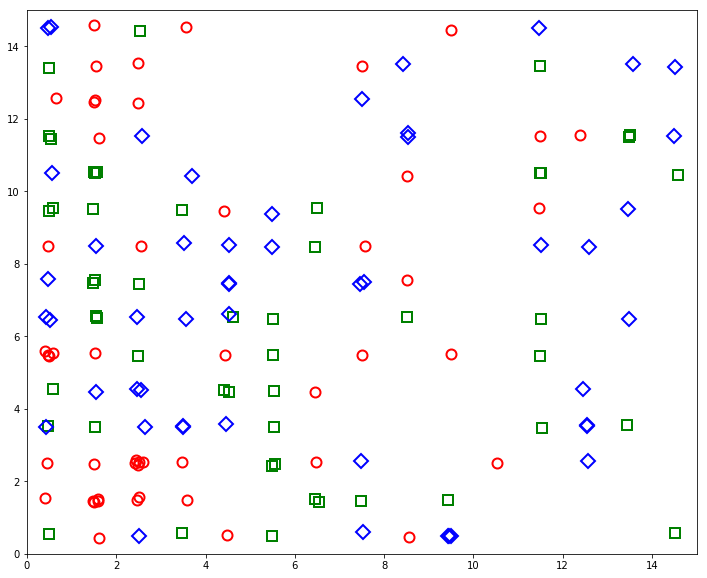

In [5]:
som.random_weights_init(data)
print("Distribucion inicial de los datos en el mapa:")
draw()

Luego de 10 iteraciones:


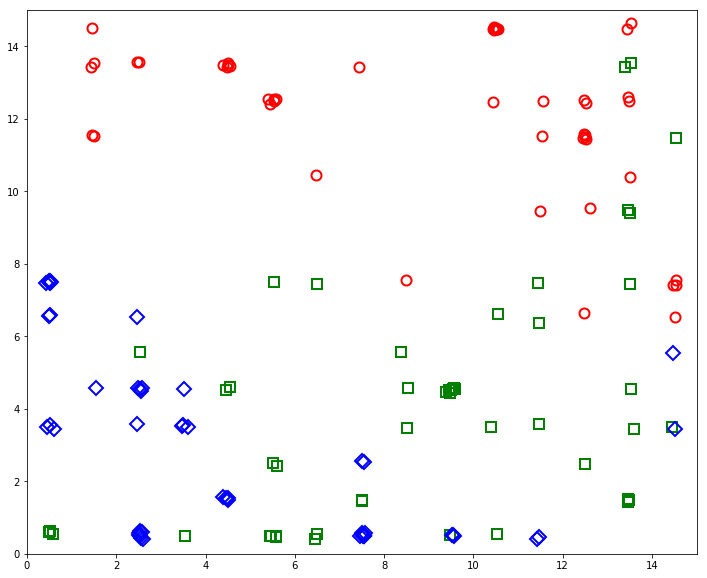

In [6]:
som.train_random(data,10) 
print("Luego de 10 iteraciones:")
draw()

Luego de 100 iteraciones:


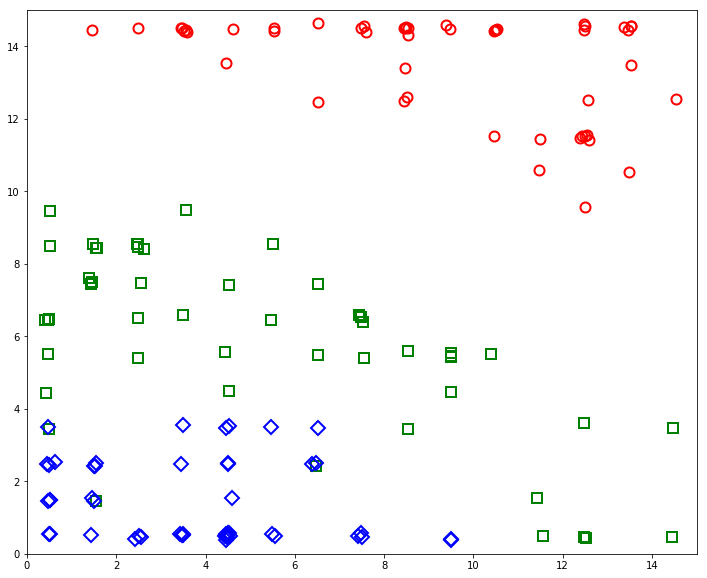

In [7]:
som.train_random(data,90) 
print("Luego de 100 iteraciones:")
draw()

Luego de 1000 iteraciones:


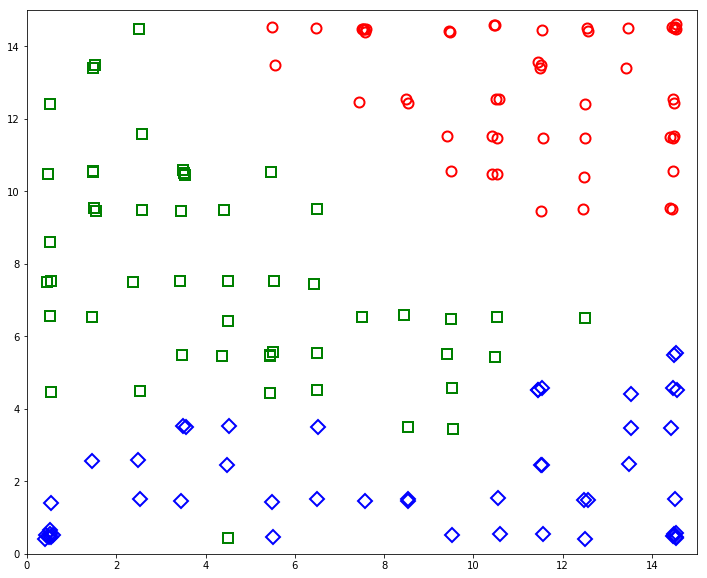

In [8]:
som.train_random(data,900)
print("Luego de 1000 iteraciones:")
draw()

Luego de 2000 iteraciones:


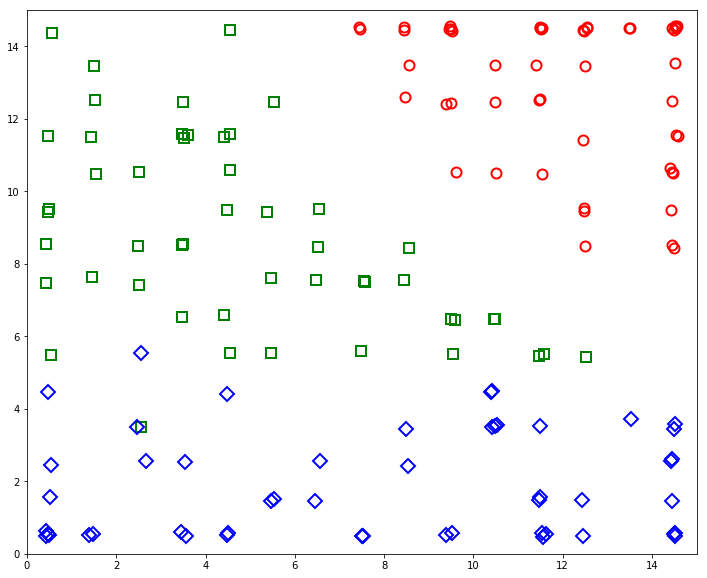

In [9]:
som.train_random(data,1000)
print("Luego de 2000 iteraciones:")
draw()

Luego de 3000 iteraciones:


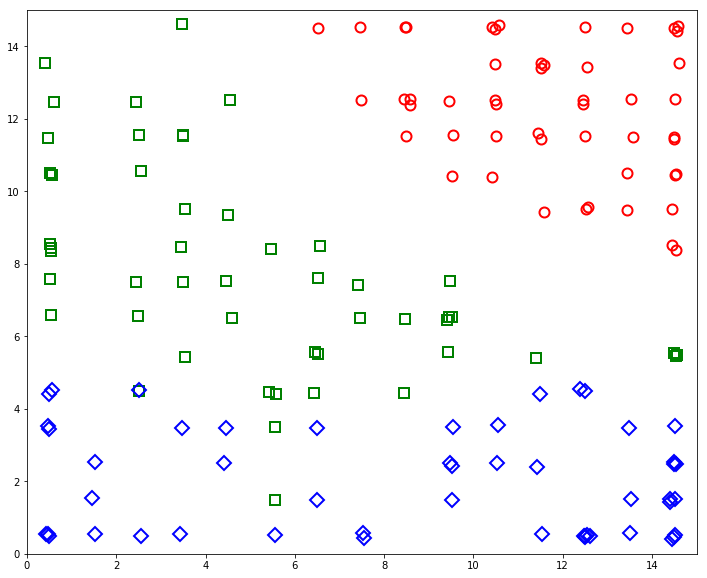

In [10]:
som.train_random(data,1000)
print("Luego de 3000 iteraciones:")
draw()

Luego de 10e3 iteraciones:


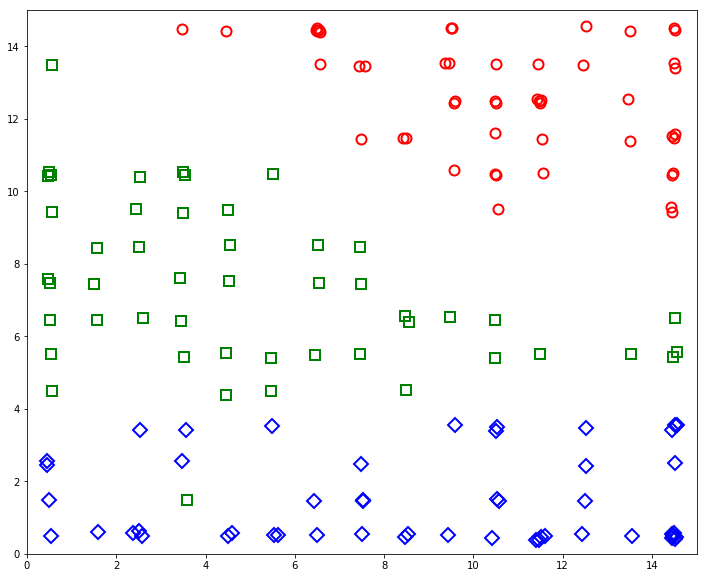

In [11]:
som.train_random(data,7000)
print("Luego de 10e3 iteraciones:")
draw()

Luego de 50e3 iteraciones:


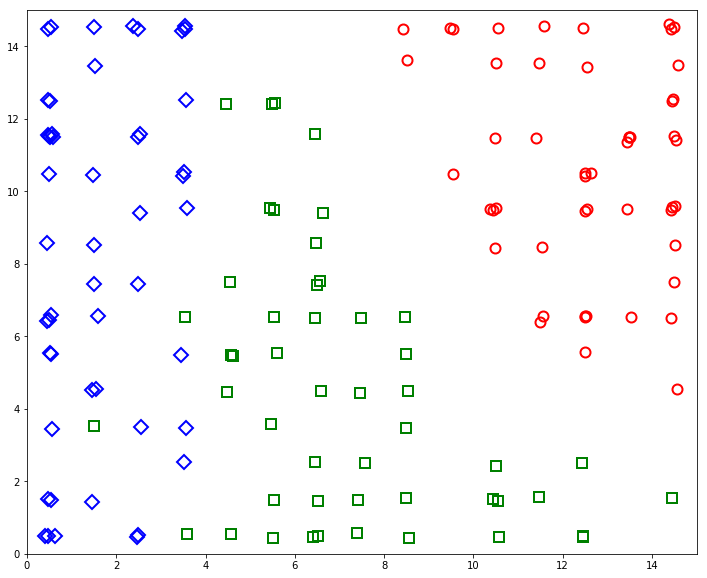

In [12]:
som.train_random(data,40000)
print("Luego de 50e3 iteraciones:")
draw()

In [23]:
som.weights.shape

(15, 15, 4)

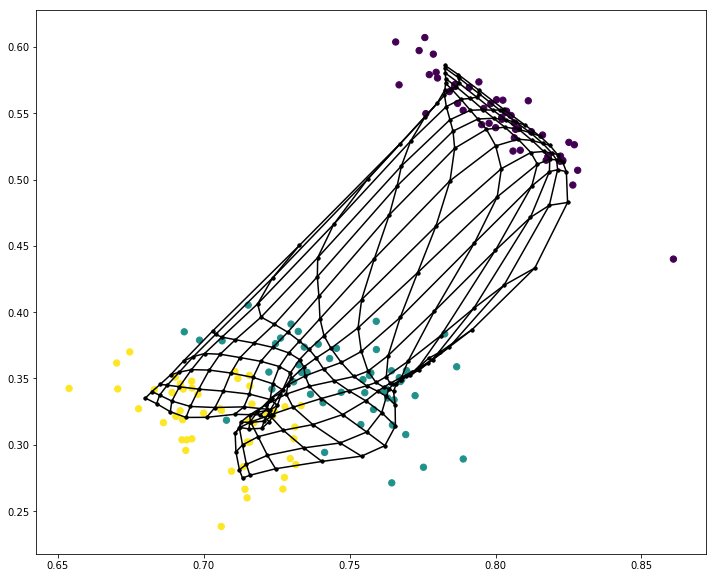

In [13]:
# Ploteo para dos variables, Ancho y Largo del PETALO
for i in range(0,X):
    plt.plot(som.weights[i,:,0],som.weights[i,:,1],'.-',c='k')
for i in range(0,Y):
    plt.plot(som.weights[:,i,0],som.weights[:,i,1],'.-',c='k')
plt.scatter(data[:,0],data[:,1], s=40, c=t)
plt.show()

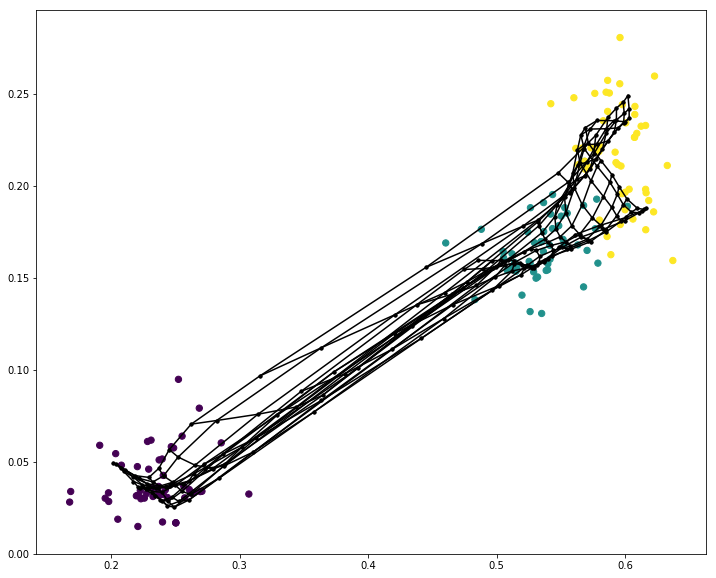

In [14]:
# Ploteo para dos variables, Ancho y Largo del SEPALO
for i in range(0,X):
    plt.plot(som.weights[i,:,2],som.weights[i,:,3],'.-',c='k')
for i in range(0,Y):
    plt.plot(som.weights[:,i,2],som.weights[:,i,3],'.-',c='k')
plt.scatter(data[:,2],data[:,3], s=40, c=t)
plt.show()

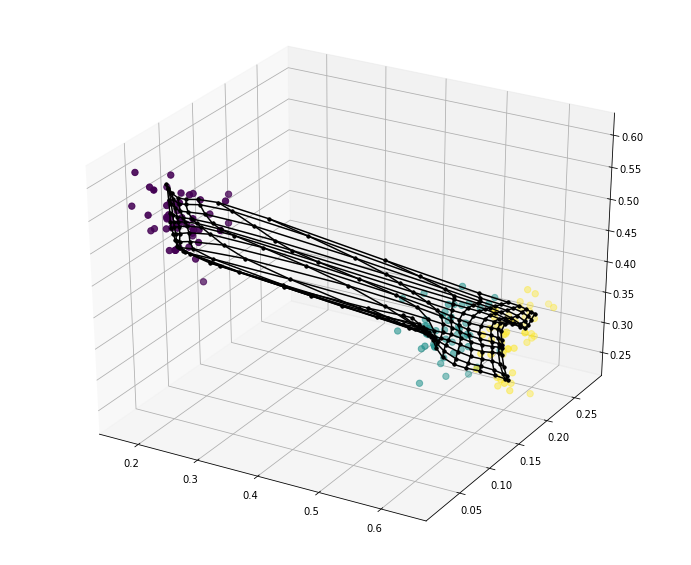

In [15]:
# Ploteo para 3 variables
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(0,X):
    ax.plot(som.weights[i,:,2],som.weights[i,:,3],som.weights[i,:,1],'.-',c='k')
for i in range(0,Y):
    ax.plot(som.weights[:,i,2],som.weights[:,i,3],som.weights[:,i,1],'.-',c='k')
ax.scatter(data[:,2], data[:,3], data[:,1],  c=t,s=40)
plt.show()

## Algunos otros ejemplos de aplicaciones de mapas auto-organizados

### Clasificación de países segun índicadores de pobreza
![title](img/som_example1.gif)
![title](img/som_example1b.bmp)

### Clasificación de textos
![title](img/som_example2.png)

### Clasificación de fonemas
![title](img/som_example3.bmp)

### Clasificación de congresistas estadounidendes
![title](img/som_example4.png)

### Regresión no lineal / cuantización de vectores
![title](img/som_example5.png)